In [2]:
# Code for Spliting  train test dataset  from scratch for  Decision Tree

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import random
from pprint import pprint

%matplotlib inline
sns.set_style("darkgrid")
#give path of Iris.csv
df = pd.read_csv("Iris.csv")
df = df.drop("Id", axis=1)
df = df.rename(columns={"species": "label"})
df.head()

def train_test_split(df, test_size):

    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)

    return train_df, test_df

random.seed(0)
train_df, test_df = train_test_split(df, test_size=20)
print(len(train_df))
print(len(test_df))
train_df
test_df

#initial setup

130
20


,sepal_length,sepal_width,petal_length,petal_width,label
98,5.1,2.5,3.0,1.1,Iris-versicolor
107,7.3,2.9,6.3,1.8,Iris-virginica
10,5.4,3.7,1.5,0.2,Iris-setosa
66,5.6,3.0,4.5,1.5,Iris-versicolor
130,7.4,2.8,6.1,1.9,Iris-virginica
124,6.7,3.3,5.7,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
77,6.7,3.0,5.0,1.7,Iris-versicolor
122,7.7,2.8,6.7,2.0,Iris-virginica
91,6.1,3.0,4.6,1.4,Iris-versicolor


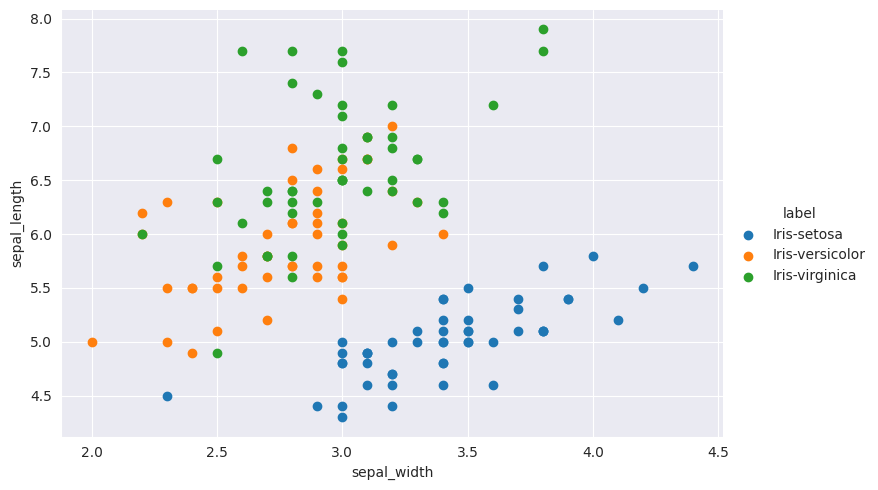

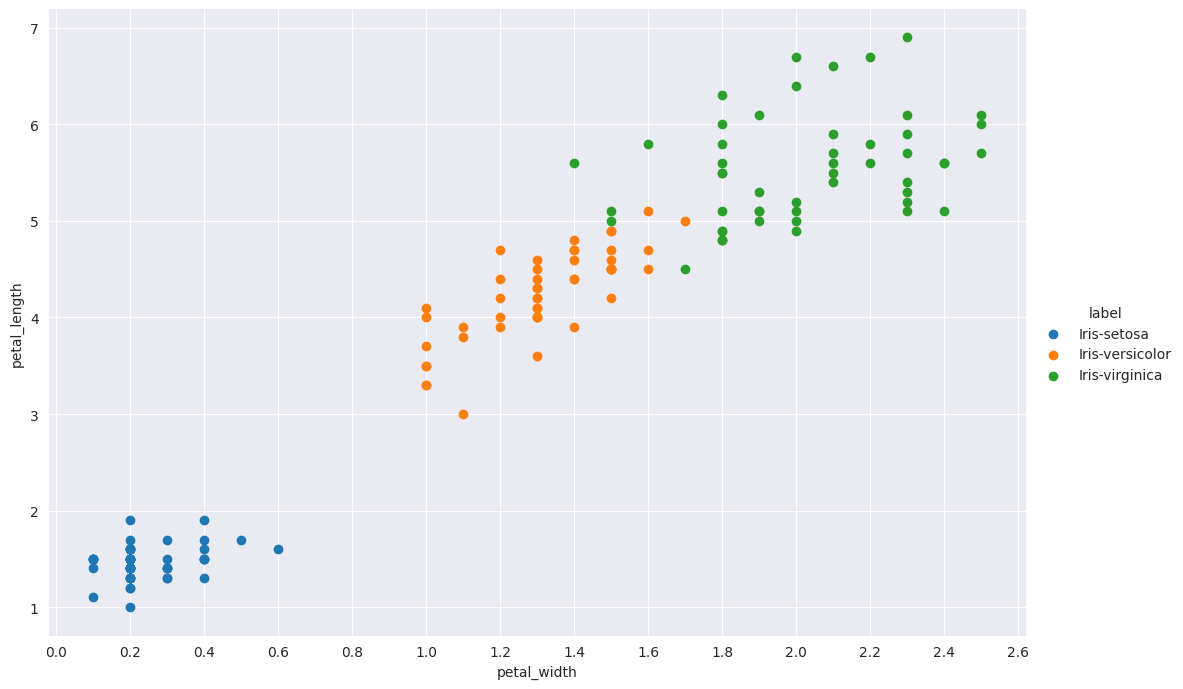

,sepal_length,sepal_width,petal_length,petal_width
label,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [3]:
#visualizing iris dataset
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import random
from pprint import pprint

%matplotlib inline
sns.set_style("darkgrid")
df = pd.read_csv("Iris.csv")
df = df.drop("Id", axis=1)
df = df.rename(columns={"species": "label"})
df["label"].value_counts()
max_petal_width=df["petal_width"].max()
df.head()
import warnings
warnings.filterwarnings("ignore")

sns.FacetGrid(df, hue="label",height=5, aspect=1.5).map(plt.scatter, "sepal_width", "sepal_length").add_legend()
plt.show()

sns.FacetGrid(df, hue="label",height=7 ,aspect=1.5).map(plt.scatter, "petal_width", "petal_length").add_legend()
plt.xticks(np.arange(0,max_petal_width+0.2,0.2)) # fixing points corresponding to x coordinates and labelling on x axis accordingly
plt.show()

#iris visualise
df.groupby('label')['sepal_length','sepal_width', 'petal_length', 'petal_width'].agg('mean')

In [4]:
df["label"].value_counts()  # getting unique occurences for each flower class in iris dataset

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: label, dtype: int64

In [12]:
#Practical 10 code for decision tree on a given dataset
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import random
from pprint import pprint
%matplotlib inline
sns.set_style("darkgrid")
df = pd.read_csv("Iris.csv")
df = df.drop("Id", axis=1)
df = df.rename(columns={"species": "label"})
df.head()

def train_test_split(df, test_size):

    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)

    return train_df, test_df

data = train_df.values
data[:5]

def check_purity(data):

    label_column = data[:, -1]
    unique_classes = np.unique(label_column)

    if len(unique_classes) == 1:
        return True
    else:
        return False

def classify_data(data):

    label_column = data[:, -1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)

    index = counts_unique_classes.argmax()
    classification = unique_classes[index]

    return classification

def get_potential_splits(data):

    potential_splits = {}
    _, n_columns = data.shape
    for column_index in range(n_columns - 1):        # excluding the last column which is the label
        potential_splits[column_index] = []
        values = data[:, column_index]
        unique_values = np.unique(values)

        for index in range(len(unique_values)):
            if index != 0:
                current_value = unique_values[index]
                previous_value = unique_values[index - 1]
                potential_split = (current_value + previous_value) / 2

                potential_splits[column_index].append(potential_split)

    return potential_splits

def split_data(data, split_column, split_value):

    split_column_values = data[:, split_column]

    data_below = data[split_column_values <= split_value]
    data_above = data[split_column_values >  split_value]

    return data_below, data_above

def calculate_entropy(data):

    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))

    return entropy

def calculate_overall_entropy(data_below, data_above):

    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_entropy =  (p_data_below * calculate_entropy(data_below)
                      + p_data_above * calculate_entropy(data_above))

    return overall_entropy

def determine_best_split(data, potential_splits):

    overall_entropy = 9999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)

            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value

    return best_split_column, best_split_value

sub_tree = {"question": ["yes_answer",
                         "no_answer"]}
example_tree = {"petal_width <= 0.8": ["Iris-setosa",
                                      {"petal_width <= 1.65": [{"petal_length <= 4.9": ["Iris-versicolor",
                                                                                        "Iris-virginica"]},
                                                                "Iris-virginica"]}]}

def decision_tree_algorithm(df, counter=0, min_samples=2, max_depth=5):

    # data preparations
    if counter == 0:
        global COLUMN_HEADERS
        COLUMN_HEADERS = df.columns
        data = df.values
    else:
        data = df


    # base cases
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)

        return classification


    # recursive part
    else:
        counter += 1

        # helper functions
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)

        # instantiate sub-tree
        feature_name = COLUMN_HEADERS[split_column]
        question = "{} <= {}".format(feature_name, split_value)
        sub_tree = {question: []}

        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth)

        # If the answers are the same, then there is no point in asking the question.
        # This could happen when the data is classified even though it is not pure
        # yet (min_samples or max_depth base cases).
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)

        return sub_tree

def classify_example(example, tree):
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split()

    # ask question
    if example[feature_name] <= float(value):
        answer = tree[question][0]
    else:
        answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer

    # recursive part
    else:
        residual_tree = answer
        return classify_example(example, residual_tree)

def calculate_accuracy(df, tree):

    df["classification"] = df.apply(classify_example, axis=1, args=(tree,))
    df["classification_correct"] = df["classification"] == df["label"]

    accuracy = df["classification_correct"].mean()

    return accuracy*100

train_df, test_df = train_test_split(df, test_size=20)
tree = decision_tree_algorithm(train_df, max_depth=3)
accuracy = calculate_accuracy(test_df, tree)
pprint(tree)
print(accuracy)

# decision tree

{'petal_width <= 0.8': ['Iris-setosa',
                        {'petal_width <= 1.75': [{'petal_length <= 4.95': ['Iris-versicolor',
                                                                           'Iris-virginica']},
                                                 'Iris-virginica']}]}
100.0
